<a href="https://colab.research.google.com/github/DivyaIITM/image_classifiaction/blob/main/classification_of_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
X_train = pd.read_csv('/content/input.csv')
Y_train = pd.read_csv('/content/labels.csv')
X_test = pd.read_csv('/content/input_test.csv')
Y_test = pd.read_csv('/content/labels_test.csv')

In [3]:
X_train.shape

(86, 30000)

In [4]:
Y_train.shape

(1999, 1)

In [5]:
X_test.shape

(82, 30000)

In [6]:
Y_test.shape

(399, 1)

In [7]:
X_train= X_train.values
X_train = X_train.reshape(len(X_train), 100, 100, 3)

In [8]:
X_train.shape

(86, 100, 100, 3)

In [9]:
Y_train = Y_train.values
Y_train= Y_train.reshape(1999, 1)


In [10]:
X_test= X_test.values
X_test = X_test.reshape(len(X_test), 100, 100, 3)

In [11]:
X_test.shape

(82, 100, 100, 3)

In [12]:
Y_test= Y_test.values
Y_test = Y_test.reshape(len(Y_test), 1)

In [13]:
Y_test.shape


(399, 1)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

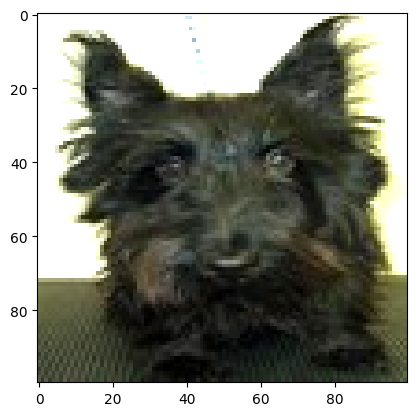

In [15]:
idx = random.randint(0, len(X_train) - 1)
image = X_train[idx].astype(float) / 200  # Normalize to [0.0, 1.0]
plt.imshow(image)
plt.show()

In [16]:
model = Sequential([
    Conv2D(32,(3,3),activation ='relu',input_shape = (100,100,3)),
           MaxPooling2D((2,2)),
           Conv2D(32,(3,3),activation ='relu'),
           Flatten(),
           Dense(64 , activation = 'relu'),
           Dense(1,activation = 'sigmoid')
])

In [17]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam',metrics = ['accuracy'])

In [18]:
# Assuming you want to match the sample count of X_train
num_samples_to_match = len(X_train)
random_indices = np.random.choice(len(Y_train), num_samples_to_match, replace=False)
Y_train = Y_train[random_indices]


In [19]:
model.fit(X_train,Y_train,epochs = 5,batch_size = 64)

Epoch 1/5
2/2 [==============================] - 3s 448ms/step - loss: nan - accuracy: 0.4767
Epoch 2/5
2/2 [==============================] - 1s 246ms/step - loss: nan - accuracy: 0.4535
Epoch 3/5
2/2 [==============================] - 1s 245ms/step - loss: nan - accuracy: 0.4535
Epoch 4/5
2/2 [==============================] - 1s 240ms/step - loss: nan - accuracy: 0.4535
Epoch 5/5
2/2 [==============================] - 1s 252ms/step - loss: nan - accuracy: 0.4535


In [20]:
num_samples_to_match = len(X_test)
random_indices = np.random.choice(len(Y_test), num_samples_to_match, replace=False)
Y_test = Y_test[random_indices]


In [21]:
model.evaluate(X_test,Y_test)

3/3 [==============================] - 0s 86ms/step - loss: nan - accuracy: 0.5244


[nan, 0.5243902206420898]

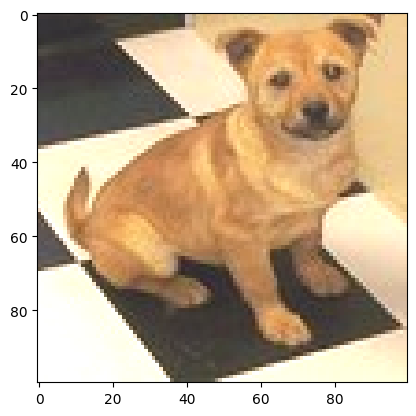

1/1 [==============================] - 0s 122ms/step
dog


In [22]:
idx2 = random.randint(0, len(Y_test) - 1)
image = X_test[idx].astype(float) / 200 # Normalize to [0.0, 1.0]
plt.imshow(image)
plt.show()

Y_pred = model.predict(X_test[idx2, :].reshape(1,100,100,3))
Y_pred = Y_pred > 0.5
if (Y_pred == 0):
  pred = 'dog'
else:
  pred = 'cat'
print(pred)